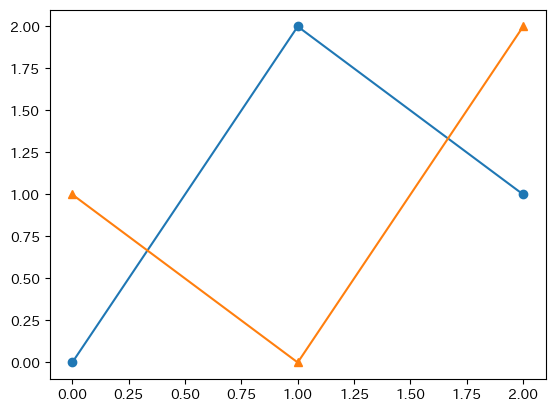

In [1]:
import matplotlib.pyplot as plt
import japanize_matplotlib

fig, ax = plt.subplots()
ax.plot([0, 1, 2], [0, 2, 1], marker="o")
ax.plot([0, 1, 2], [1, 0, 2], marker="^")

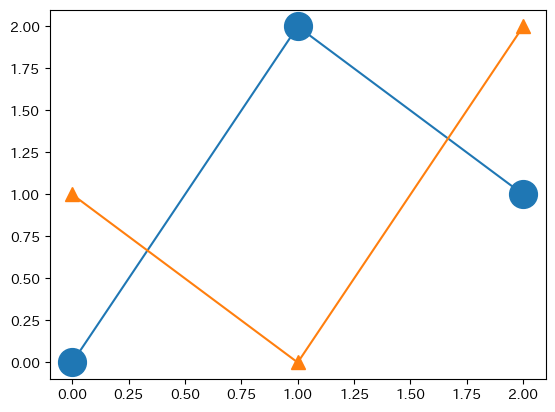

In [2]:
fig, ax = plt.subplots()
ax.plot([0, 1, 2], [0, 2, 1], marker="o", markersize="20")
ax.plot([0, 1, 2], [1, 0, 2], marker="^", ms="10")

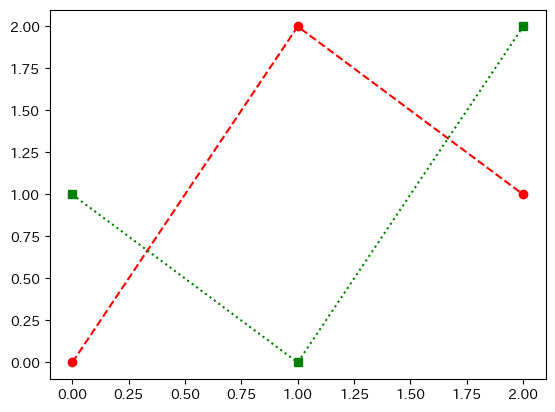

In [3]:
fig, ax = plt.subplots()
ax.plot([0, 1, 2], [0, 2, 1], "o--r")
ax.plot([0, 1, 2], [1, 0, 2], "s:g")

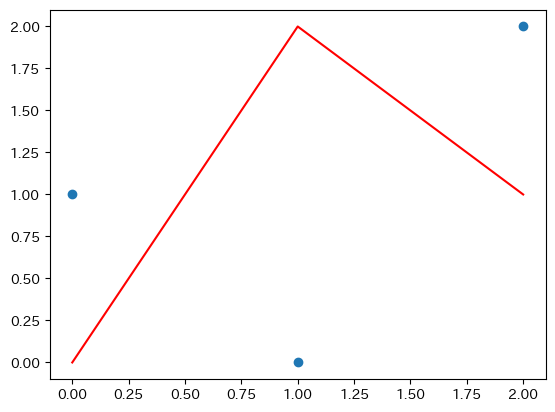

In [4]:
fig, ax = plt.subplots()
ax.plot([0, 1, 2], [0, 2, 1], "r")
ax.plot([0, 1, 2], [1, 0, 2], "o")

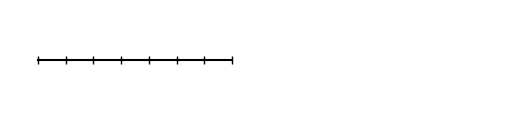

In [5]:
fig = plt.figure(figsize=(5, 1))
ax = fig.add_axes([0, 0, 1, 1])
ax.clear()
ax.axis("off")
ax.set_xlim(-4, 14)
ax.set_ylim(-1.5, 1.5)

ax.plot(range(-3, 5), [0] * 8, "|-k")

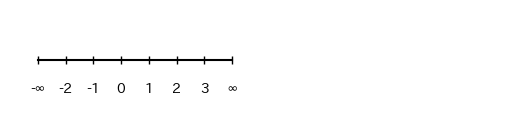

In [6]:
fig = plt.figure(figsize=(5, 1))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis("off")
ax.set_xlim(-4, 14)
ax.set_ylim(-1.5, 1.5)

minus_inf = -3
plus_inf = 4
ax.plot(range(minus_inf, plus_inf + 1), [0] * (plus_inf - minus_inf + 1) , "|-k")
for num in range(minus_inf, plus_inf + 1):
    if num == minus_inf:
        numtext = "-∞"
    elif num == plus_inf:
        numtext = "∞"
    else:
        numtext = num
    ax.text(num, -1, numtext, ha="center")

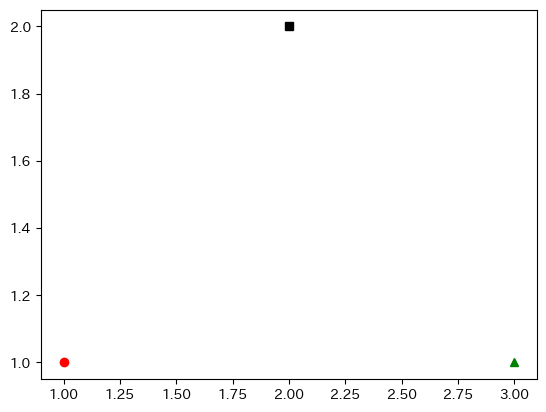

In [7]:
fig, ax = plt.subplots()
ax.plot(1, 1, "or") # 赤い丸のマーカー
ax.plot(3, 1, "^g") # 緑の三角形のマーカー
ax.plot(2, 2, "sk") # 黒い四角形のマーカー

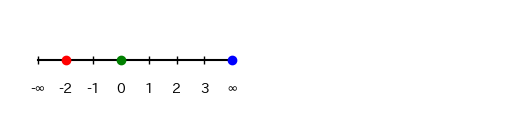

In [8]:
alpha = -2
beta = float("inf")
score = 0

fig = plt.figure(figsize=(5, 1))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis("off")
ax.set_xlim(-4, 14)
ax.set_ylim(-1.5, 1.5)

minus_inf = -3
plus_inf = 4
ax.plot(range(minus_inf, plus_inf + 1), [0] * (plus_inf + 1 - minus_inf) , "|-k")
for num in range(minus_inf, plus_inf + 1):
    if num == minus_inf:
        numtext = "-∞"
    elif num == plus_inf:
        numtext = "∞"
    else:
        numtext = num
    ax.text(num, -1, numtext, ha="center")
    
alphacoord = max(minus_inf, alpha)
betacoord = min(plus_inf, beta)
ax.plot(alphacoord, 0, "or")
ax.plot(betacoord, 0, "ob")
ax.plot(score, 0, "og")

Text(0.5, 1, 'score = 0')

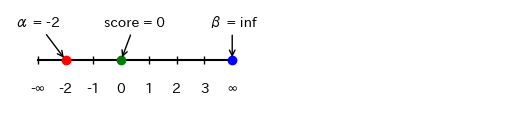

In [9]:
alpha = -2
beta = float("inf")
score = 0

fig = plt.figure(figsize=(5, 1))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis("off")
ax.set_xlim(-4, 14)
ax.set_ylim(-1.5, 1.5)

minus_inf = -3
plus_inf = 4
ax.plot(range(minus_inf, plus_inf + 1), [0] * (plus_inf + 1 - minus_inf) , "|-k")
for num in range(minus_inf, plus_inf + 1):
    if num == minus_inf:
        numtext = "-∞"
    elif num == plus_inf:
        numtext = "∞"
    else:
        numtext = num
    ax.text(num, -1, numtext, ha="center")
    
alphacoord = max(minus_inf, alpha)
betacoord = min(plus_inf, beta)
arrowprops = { "arrowstyle": "->"}
ax.plot(alphacoord, 0, "or")
ax.annotate(f"α = {alpha}", xy=(alphacoord, 0), xytext=(minus_inf, 1),
              arrowprops=arrowprops, ha="center")
ax.plot(betacoord, 0, "ob")
ax.annotate(f"β = {beta}", xy=(betacoord, 0), xytext=(plus_inf, 1),
              arrowprops=arrowprops, ha="center")
ax.plot(score, 0, "og")
ax.annotate(f"score = {score}", xy=(score, 0), xytext=((minus_inf + plus_inf) / 2, 1),
              arrowprops=arrowprops, ha="center")

In [10]:
from tree import Mbtree
from marubatsu import Marubatsu

def calc_score_by_ab(self, abroot, debug=False):           
    self.count = 0
      
    def calc_ab_score(node, alpha=float("-inf"), beta=float("inf")):
        self.nodelist_by_score.append(node)
        self.ablist_by_score.append((alpha, beta, None, "このノードの処理の開始"))
        self.count += 1
        if node.mb.status != Marubatsu.PLAYING:
            self.calc_score_of_node(node)
        else:
            if node.mb.turn == Marubatsu.CIRCLE:
                for childnode in node.children:
                    score = calc_ab_score(childnode, alpha, beta)
                    self.nodelist_by_score.append(node)
                    self.ablist_by_score.append((alpha, beta, score, f"child score = {score}"))
                    if score >= beta:
                        alpha = score
                        self.nodelist_by_score.append(node)
                        self.ablist_by_score.append((alpha, beta, None, f"child score = {score} ≧ {beta}(β値) によるβ狩り"))
                        break
                    if score > alpha:
                        message = f"child score = {score} > {alpha}(α値)によるα値の更新"
                        alpha = score
                    else:
                        message = f"child score = {score} ≦ {alpha}(α値)なのでα値の更新は行わない"
                    self.nodelist_by_score.append(node)
                    self.ablist_by_score.append((alpha, beta, None, message))
                node.score = alpha
            else:
                for childnode in node.children:
                    score = calc_ab_score(childnode, alpha, beta)
                    self.nodelist_by_score.append(node)
                    self.ablist_by_score.append((alpha, beta, score, f"child score = {score}"))
                    if score <= alpha:
                        beta = score
                        self.nodelist_by_score.append(node)
                        self.ablist_by_score.append((alpha, beta, None, f"child score = {score} ≦ {alpha}(α値)によるα狩り"))
                        break
                    if score < beta:
                        message = f"child score = {score} < {beta}(β値) によるβ値の更新"
                        beta = score
                    else:
                        message = f"child score = {score} ≧ {beta}(β値) なのでβ値の更新は行わない"
                    self.nodelist_by_score.append(node)
                    self.ablist_by_score.append((alpha, beta, None, message))
                node.score = beta

        self.nodelist_by_score.append(node)
        self.ablist_by_score.append((alpha, beta, None, f"このノードの評価値が {node.score} で確定"))
        node.score_index = len(self.nodelist_by_score) - 1          
        return node.score

    from ai import dprint       
    for node in self.nodelist:
        node.score_index = float("inf")
    self.nodelist_by_score = []
    self.ablist_by_score = []
    calc_ab_score(abroot)
    dprint(debug, "count =", self.count) 
    
Mbtree.calc_score_by_ab = calc_score_by_ab

In [11]:
from tree import Mbtree_Anim
import ipywidgets as widgets

def create_widgets(self):
    self.play = widgets.Play(max=self.nodenum - 1, interval=500)
    self.prev_button = self.create_button("<", width=30)
    self.next_button = self.create_button(">", width=30)
    self.frame_slider = widgets.IntSlider(max=self.nodenum - 1, description="frame")
    self.interval_slider = widgets.IntSlider(value=500, min=1, max=2000, description="interval")
    widgets.jslink((self.play, "value"), (self.frame_slider, "value"))    
    widgets.jslink((self.play, "interval"), (self.interval_slider, "value"))

    with plt.ioff():
        self.fig = plt.figure(figsize=[self.width * self.size,
                                        self.height * self.size])
        self.ax = self.fig.add_axes([0, 0, 1, 1])
        self.fig.canvas.toolbar_visible = False
        self.fig.canvas.header_visible = False
        self.fig.canvas.footer_visible = False
        self.fig.canvas.resizable = False 
        if self.isscore and hasattr(self.mbtree, "ablist_by_score"):
            self.abfig = plt.figure(figsize=(5, 1))
            self.abax = self.abfig.add_axes([0, 0, 1, 1])
            self.abfig.canvas.toolbar_visible = False
            self.abfig.canvas.header_visible = False
            self.abfig.canvas.footer_visible = False
            self.abfig.canvas.resizable = False 
        else:
            self.abfig = None
        
Mbtree_Anim.create_widgets = create_widgets

In [12]:
def display_widgets(self):
    hbox = widgets.HBox([self.play, self.prev_button, self.next_button, self.frame_slider, self.interval_slider])
    if self.abfig is None:
        display(widgets.VBox([hbox, self.fig.canvas])) 
    else:
        display(widgets.VBox([hbox, self.abfig.canvas, self.fig.canvas])) 

Mbtree_Anim.display_widgets = display_widgets

In [13]:
from marubatsu import Marubatsu

def update_ab(self):
    fontsize = 70 * self.size
    alpha, beta, score, message = self.mbtree.ablist_by_score[self.play.value]
    acolor = "red" if self.selectednode.mb.turn == Marubatsu.CIRCLE else "black"
    bcolor = "black" if self.selectednode.mb.turn == Marubatsu.CIRCLE else "red"
    self.ax.text(0, -1, f"α: {alpha}", fontsize=fontsize, c=acolor)        
    self.ax.text(9, -1, f"β: {beta}", fontsize=fontsize, c=bcolor)        
    self.ax.text(19, -1, message, fontsize=fontsize)             
                            
    self.abax.clear()
    self.abax.set_xlim(-4, 14)
    self.abax.set_ylim(-1.5, 1.5)
    self.abax.axis("off")

    minus_inf = -3
    plus_inf = 4
    self.abax.plot(range(minus_inf, plus_inf + 1), [0] * (plus_inf + 1 - minus_inf) , "|-k")
    for num in range(minus_inf, plus_inf + 1):
        if num == minus_inf:
            numtext = "-∞"
        elif num == plus_inf:
            numtext = "∞"
        else:
            numtext = num
        self.abax.text(num, -1, numtext, ha="center")
        
    alphacoord = max(minus_inf, alpha)
    betacoord = min(plus_inf, beta)
    arrowprops = { "arrowstyle": "->"}
    self.abax.plot(alphacoord, 0, "or")
    self.abax.annotate(f"α = {alpha}", xy=(alphacoord, 0), xytext=(minus_inf, 1),
                       arrowprops=arrowprops, ha="center")
    self.abax.plot(betacoord, 0, "ob")
    self.abax.annotate(f"β = {beta}", xy=(betacoord, 0), xytext=(plus_inf, 1),
                       arrowprops=arrowprops, ha="center")
    if score is not None:
        self.abax.plot(score, 0, "og")
        self.abax.annotate(f"score = {score}", xy=(score, 0), xytext=((minus_inf + plus_inf) / 2, 1),
                           arrowprops=arrowprops, ha="center")
                            
Mbtree_Anim.update_ab = update_ab

In [14]:
def update_gui(self):
    self.ax.clear()
    self.ax.set_xlim(-1, self.width - 1)
    self.ax.set_ylim(-2, self.height - 2)   
    self.ax.invert_yaxis()
    self.ax.axis("off")   
    
    self.selectednode = self.nodelist[self.play.value]
    self.centernode = self.selectednode
    if self.mbtree.algo == "bf":
        if self.centernode.depth > 0:
            self.centernode = self.centernode.parent
    while self.centernode.depth > 6:
        self.centernode = self.centernode.parent
    if self.centernode.depth <= 4:
        maxdepth = self.centernode.depth + 1
    elif self.centernode.depth == 5:
        maxdepth = 7
    else:
        maxdepth = 9
    self.mbtree.draw_subtree(centernode=self.centernode, selectednode=self.selectednode,
                             anim_frame=self.play.value, isscore=self.isscore, 
                             ax=self.ax, maxdepth=maxdepth, size=self.size)
    if self.abfig is not None:
        self.update_ab()
                            
    disabled = self.play.value == 0
    self.set_button_status(self.prev_button, disabled=disabled)
    disabled = self.play.value == self.nodenum - 1
    self.set_button_status(self.next_button, disabled=disabled)
    
Mbtree_Anim.update_gui = update_gui

In [ ]:
mbtree = Mbtree(algo="df")
mbtree.calc_score_by_ab(mbtree.root)
Mbtree_Anim(mbtree, isscore=True)